<a href="https://colab.research.google.com/github/israr96418/Dog_vs_cat_classification_keras/blob/main/Cat_vs_dog_imageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [10]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:07<00:00, 174MB/s]
100% 1.06G/1.06G [00:07<00:00, 143MB/s]


In [11]:
import zipfile
myzip_data = zipfile.ZipFile("/content/dogs-vs-cats.zip", "r")
myzip_data.extractall("/content")
myzip_data.close()

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten,BatchNormalization


In [13]:
# create 2 Generator(divide the data into batches)
# generator work very well with large data b/z it divide into small batches
# if we have 1million of images-->so to pass all images at a time will be very time consuming some time 
# may be RAM will be not sufficient for this 

# so thats way we divide into batches ant pass it every batch to process

# 3 types of generator
  #  1: fit_generator(one for train and another for validation)
  #  2:evalute_generator(similar to fit_generator)
  #  3:predict_generator

train_data =  keras.utils.image_dataset_from_directory(
    directory ="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size =30,
    image_size =(256,256)

) 

test_data =  keras.utils.image_dataset_from_directory(
    directory ="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size =30,
    image_size =(256,256)


) 

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
# Normalization
# As we known that RGB images having every pixel as triplet([0-255,0-255,0-255])
# we want to convert into 0-255 every triplet in ever pxel

def Normalization(image, label):
  image = tf.cast(image/255., tf.float32)
  return image,label


train_data = train_data.map(Normalization)
test_data = test_data.map(Normalization)

In [47]:
# Create CNN model
model = Sequential()

# first Convnet layer
model.add(Conv2D(32,kernel_size=(3,3), activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides =2, padding='valid'))

# 2nd convnet layer
model.add(Conv2D(64,kernel_size=(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides =2, padding='valid'))

# 3rd convet layer
model.add(Conv2D(128,kernel_size=(3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides =2, padding='valid'))

# convert any dimensionality into ID
model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [49]:
# comiple your model
model.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy'])

In [50]:
model.fit(train_data, epochs=15,verbose=1 ,validation_data=test_data)

Epoch 1/15
667/667 [==============================] - 74s 109ms/step - loss: 1.2434 - accuracy: 0.6047 - val_loss: 0.6137 - val_accuracy: 0.6556
Epoch 2/15
667/667 [==============================] - 73s 109ms/step - loss: 0.5668 - accuracy: 0.7110 - val_loss: 0.5232 - val_accuracy: 0.7496
Epoch 3/15
667/667 [==============================] - 73s 109ms/step - loss: 0.4863 - accuracy: 0.7666 - val_loss: 0.4629 - val_accuracy: 0.7802
Epoch 4/15
667/667 [==============================] - 73s 109ms/step - loss: 0.4132 - accuracy: 0.8122 - val_loss: 0.6251 - val_accuracy: 0.6970
Epoch 5/15
667/667 [==============================] - 73s 109ms/step - loss: 0.3449 - accuracy: 0.8510 - val_loss: 1.0370 - val_accuracy: 0.6776
Epoch 6/15
667/667 [==============================] - 73s 109ms/step - loss: 0.2620 - accuracy: 0.8918 - val_loss: 0.5076 - val_accuracy: 0.7920
Epoch 7/15
667/667 [==============================] - 73s 109ms/step - loss: 0.1849 - accuracy: 0.9261 - val_loss: 1.4435 - val_ac

In [51]:
evalute = model.evaluate(test_data, verbose=0)
print("test loss", evalute[0])
print("test accuracy:", evalute[1])

test loss 0.9126704335212708
test accuracy: 0.8284000158309937


In [ ]:
# As from the above result the val_accuracy very low (means we have to overfitting)
# to avoid overfitting and increase val_accuracy we have the following method
# 1:L1-regularization
# 2:L1-regularization
# 3:Dropout layer
# 4:Batch_Normalization
# 5:data augmentation
#6: complex your model-->increase conv2d layer , number of kernal metrices, size of kernal metrices

In [ ]:
# from numpy import histogram
# # I want to draw a graph to visualized the difference train accuracy and validation_accuracy
# import matplotlib.pyplot as plt
# plt.plot(history.history['accuracy'],color='red',label='train_accuracy')
# plt.plot(history.history['val_accuracy'],color='blue',label='val_accuracy')
# plt.legend()
# plt.show()

In [ ]:
# from numpy import histogram
# # I want to draw a graph to visualized the difference train accuracy and validation_accuracy
# import matplotlib.pyplot as plt
# plt.plot(history.history['loss'],color='red',label='train_accuracy')
# plt.plot(history.history['val_loss'],color='blue',label='val_accuracy')
# plt.legend()
# plt.show()


In [20]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
import cv2
test_image = cv2.imread("/content/dg8.jpg")

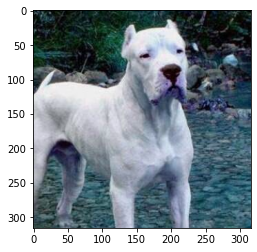

In [111]:
import matplotlib.pyplot as plt
plt.imshow(test_image)

In [112]:
test_image.shape

(316, 316, 3)

In [113]:
test_image = cv2.resize(test_image,(256,256))

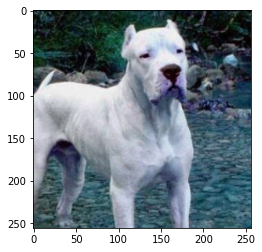

In [114]:
plt.imshow(test_image)

In [115]:
test_input_image = test_image.reshape(1,256,256,3)

In [116]:
model.predict(test_input_image)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)